# Cognition Academy of the Max Planck School of Cognition

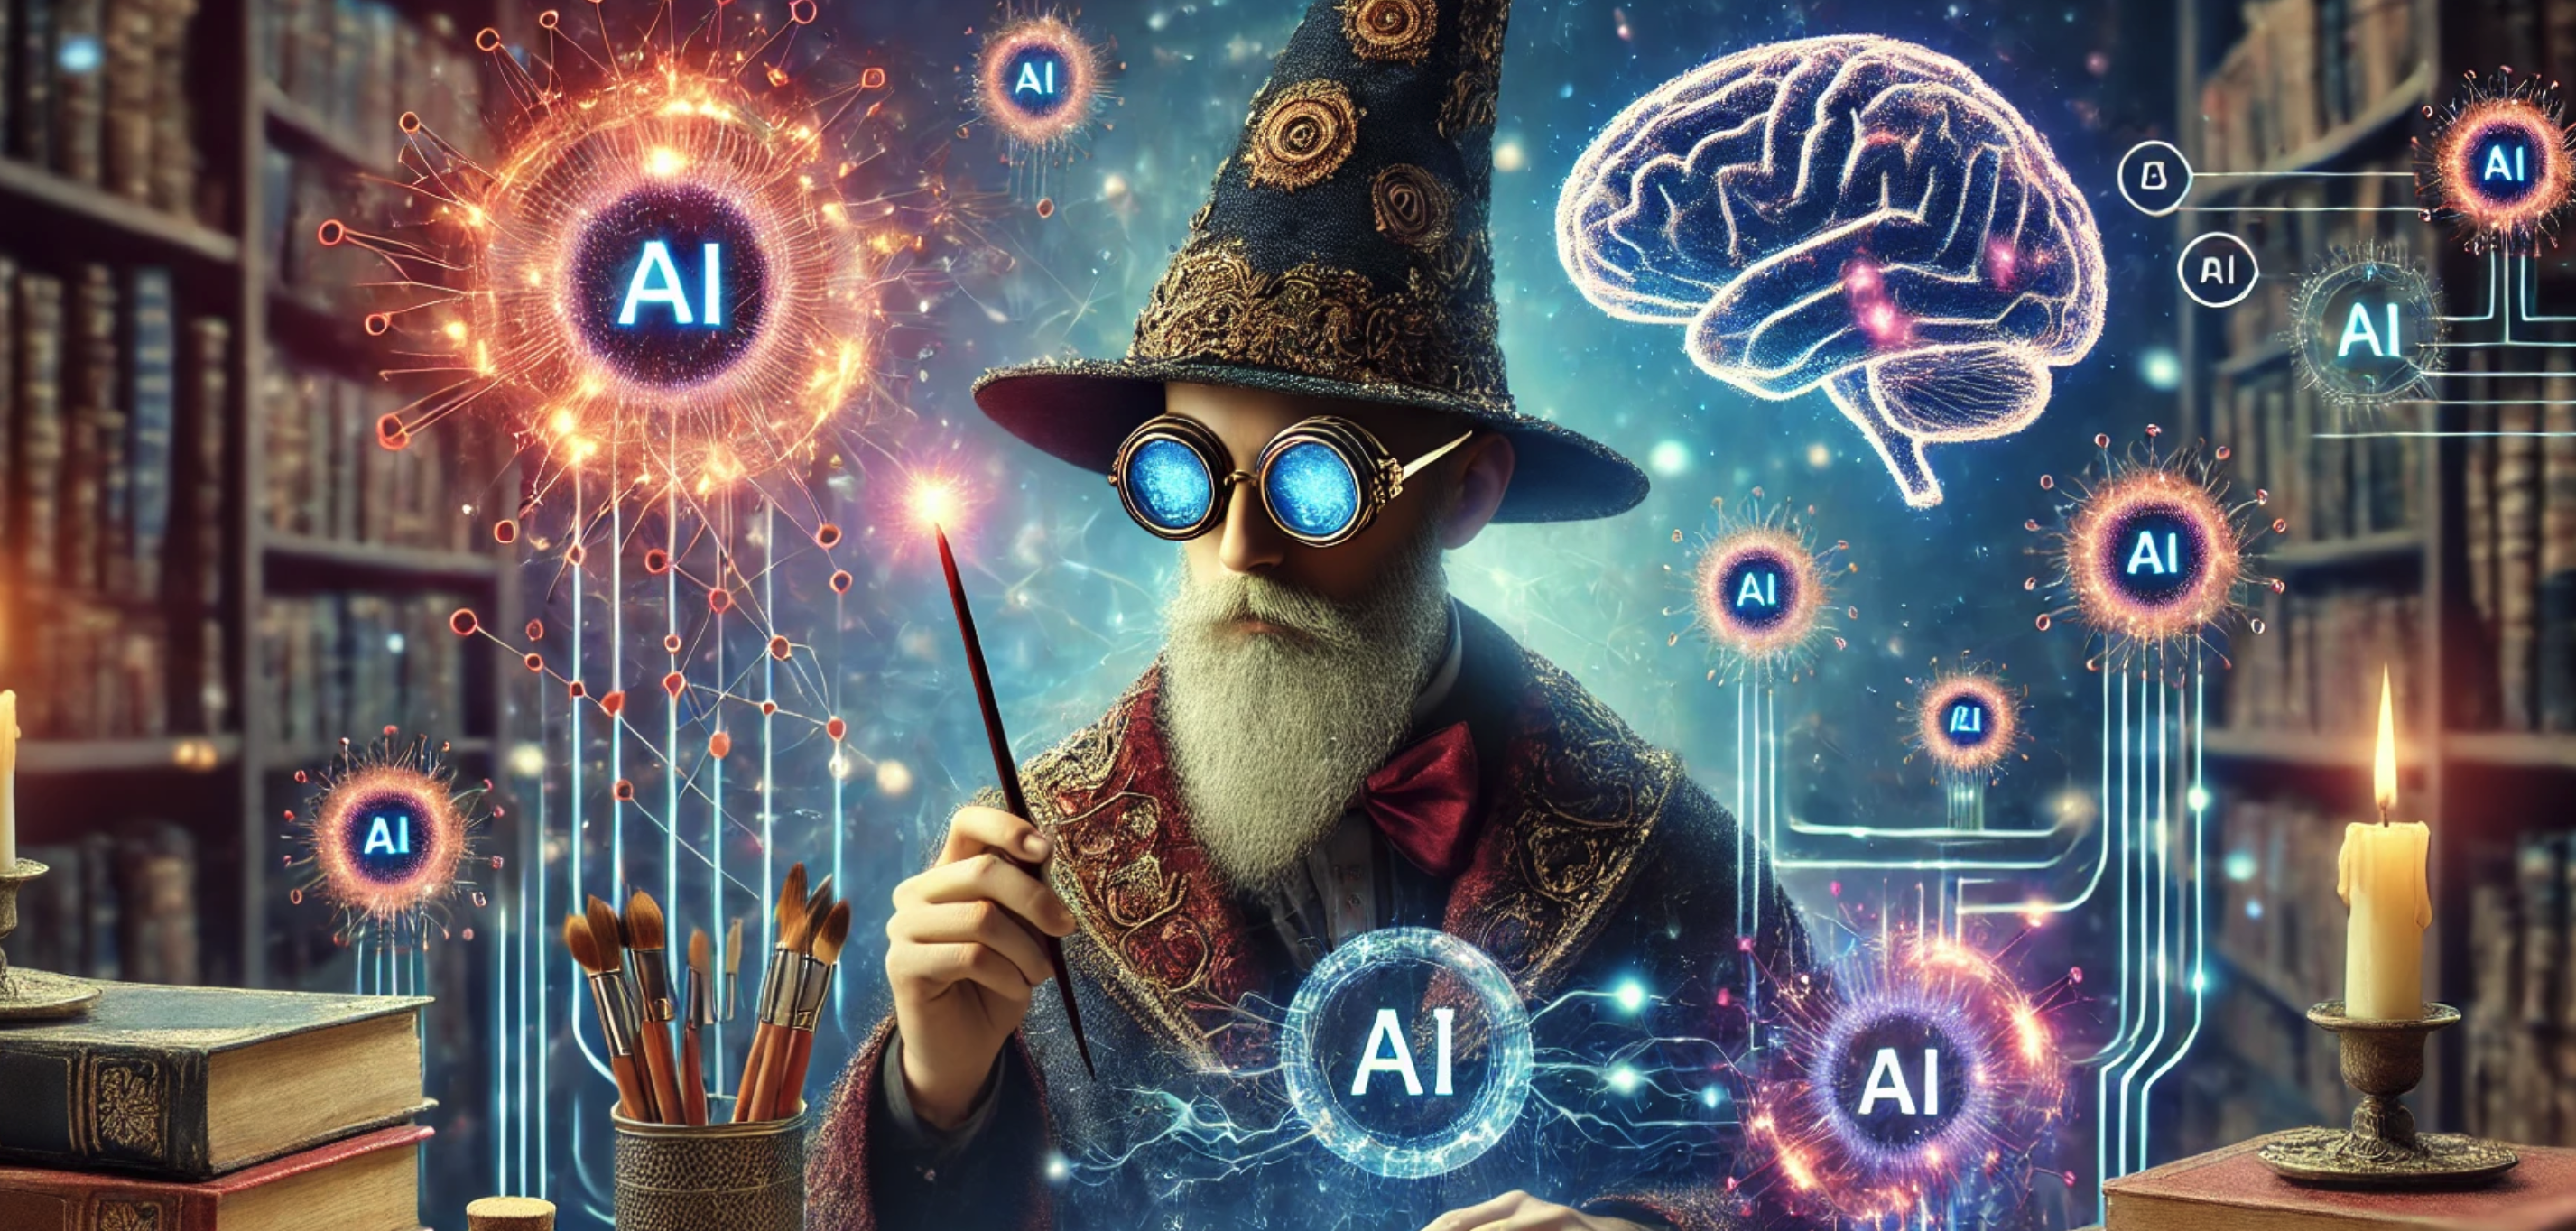

#Tutorial Notebook 2: Predicting Neural Activiity to Harry Potter using RSA and Linear Encoding
---
---

## What is the Dataset?

This dataset is fMRI obrtained from eight participants reading chapter 9 of the first Harry Potter. Each word appeared on the screen for 0.5 seconds, and the time resolution used for acquiring brain signals (TR) was 2 seconds. The
chapter was divided into four runs of approximately equal length. Originally from (Wehbe et. al. 2014): [Simultaneously uncovering the patterns of brain regions involved in different story reading subprocesses](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0112575).

---

## What is this notebook about?

This notebook will take a look at the data available and try to explain and predict neural activitiy using RSA and Linear Encoding to make aware of the differences these metrics can make


This notebook will cover the following steps:

0. Configuration - Downloading neccessary data
1. Downloading the dataset
2. Getting to know the data before playing with it
3. Correlation of fMRI to Large Language Models (LLMs) using Linear Encoding



---
---

# 0 | Configuration

In [ ]:
!pip install -U git+https://github.com/cvai-roig-lab/Net2Brain
!pip install ipywidgets

**Restart the runtime before continuing**

Execute the following cell for imports and helper functions

 ## 0.1 | **Execute hidden cell below for all imports and helpter functions**

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import VBox
from pprint import pprint



selected_brain_data_path = None
selected_brain_data_path_reduced = None
current_directory = os.getcwd()

# Function to display data based on selected subject
def display_data(b):
    global selected_brain_data_path  # Declare the global variable
    with output:
        output.clear_output()
        subject = subject_dropdown.value
        run = "01"  # Set run to "01" by default

        # Print selected subject and run
        display(Markdown(f"**Selected Subject:** {subject}"))
        display(Markdown(f"**Selected Run:** {run}"))

        # Construct file paths
        brain_file = f'aligned_data_subj{subject}_run{run}.npy'
        selected_brain_data_path = os.path.join(brain_data, brain_file)  # Set the global variable
        stimuli_file = f'words_TR_list_subj{subject}_run{run}.txt'
        stimuli_data_path_full = os.path.join(stimuli_data, stimuli_file)

        # Print file paths
        display(Markdown(f"**Brain data file:** {selected_brain_data_path}"))
        display(Markdown(f"**Stimuli data file:** {stimuli_data_path_full}"))

        # Load and display brain data
        subject_data = np.load(selected_brain_data_path, allow_pickle=True)
        display(Markdown("### Brain Data"))
        display(Markdown(f"**Shape of brain data:** {subject_data.shape}"))
        display(Markdown("**First 5 rows of brain data:**"))
        display(HTML(f"<pre>{subject_data[:5]}</pre>"))

        # Load and display stimuli data
        with open(stimuli_data_path_full, 'r') as file:
            words_TR_list = file.readlines()
        display(Markdown("### Stimuli Data"))
        display(Markdown(f"**Length of stimuli data:** {len(words_TR_list)}"))
        display(Markdown("**First 5 elements of stimuli data:**"))
        display(HTML(f"<pre>{''.join(words_TR_list[:5])}</pre>"))


# Function to display data based on selected subject, ROI, and hemisphere
def display_data_reduced(b):
    global selected_brain_data_path_reduced  # Declare the global variable
    with output_reduced:
        output_reduced.clear_output()
        subject = subject_dropdown_reduced.value
        hemisphere = hemisphere_dropdown.value
        roi = roi_dropdown.value
        run = "01"  # Set run to "01" by default

        # Print selected subject, hemisphere, and ROI
        display(Markdown(f"**Selected Subject:** {subject}"))
        display(Markdown(f"**Selected ROI:** {roi}"))
        display(Markdown(f"**Selected Hemisphere:** {hemisphere}"))

        # Construct file paths
        roi_file = f'{roi}_{hemisphere}_subj{subject}.npy'
        roi_data_path_full = os.path.join(roi_data, roi_file)
        selected_brain_data_path_reduced = os.path.join(roi_data, roi_file)  # Set the global variable

        stimuli_file = f'words_TR_list_subj{subject}_run{run}.txt'
        stimuli_data_path_full = os.path.join(stimuli_data, stimuli_file)

        # Print file paths
        display(Markdown(f"**ROI data file:** {roi_data_path_full}"))
        display(Markdown(f"**Stimuli data file:** {stimuli_data_path_full}"))

        # Load and display ROI data
        roi_data_loaded = np.load(roi_data_path_full, allow_pickle=True)
        display(Markdown("### ROI Data"))
        display(Markdown(f"**Shape of ROI data:** {roi_data_loaded.shape}"))
        display(Markdown("**First 5 rows of ROI data:**"))
        display(HTML(f"<pre>{roi_data_loaded[:5]}</pre>"))

        # Load and display stimuli data
        with open(stimuli_data_path_full, 'r') as file:
            words_TR_list = file.readlines()
        display(Markdown("### Stimuli Data"))
        display(Markdown(f"**Length of stimuli data:** {len(words_TR_list)}"))
        display(Markdown("**First 5 elements of stimuli data:**"))
        display(HTML(f"<pre>{''.join(words_TR_list[:5])}</pre>"))



###### Linear Encoding Widget #######


# Function to get available models from the /content/ path
def get_available_models():
    models = []
    for item in os.listdir(current_directory):
        if item.endswith('_feats') and os.path.isdir(os.path.join(current_directory, item)):
            models.append(item.replace('_feats', ''))
    return models

# Function to handle button click
def on_button_click_le_multi(b):
    run_linear_encoding(available_model_widget.value, subject_widget.value, hemisphere_widget.value, roi_widget.value,
                        n_folds_widget.value, n_components_widget.value, batch_size_widget.value)

# Function to create and display widgets
def create_linear_encoding_widgets():
    global available_model_widget, subject_widget, hemisphere_widget, roi_widget, n_folds_widget, n_components_widget, batch_size_widget, run_button

    # Define widgets for Linear Encoding Parameters
    available_models = get_available_models()
    available_model_widget = widgets.SelectMultiple(
        options=available_models,
        description='Models:',
    )

    # Define widget for subject selection
    subject_widget = widgets.SelectMultiple(
        options=[str(i) for i in range(1, 9)],
        value=['1'],
        description='Subjects',
        disabled=False
    )

    # Define widget for hemisphere selection
    hemisphere_widget = widgets.SelectMultiple(
        options=['L', 'R'],
        value=['R'],
        description='Hemispheres',
        disabled=False
    )

    # Define widget for ROI selection
    roi_widget = widgets.SelectMultiple(
        options=['Lingual', 'MFG'],
        value=['Lingual'],
        description='ROIs',
        disabled=False
    )

    # Define widgets for Linear Encoding Parameters
    n_folds_widget = widgets.IntSlider(value=3, min=1, max=10, step=1, description='n_folds')
    n_components_widget = widgets.IntSlider(value=50, min=25, max=150, step=1, description='n_components')
    batch_size_widget = widgets.IntSlider(value=100, min=50, max=150, step=1, description='batch_size')

    # Button to trigger the interaction
    run_button = widgets.Button(description="Run Linear Encoding")

    # Attach click event to the button
    run_button.on_click(on_button_click_le_multi)

    # Arrange widgets in the desired order
    ui = VBox([subject_widget, available_model_widget, hemisphere_widget, roi_widget, n_folds_widget, n_components_widget, batch_size_widget, run_button])

    # Display the arranged UI
    display(ui)





def load_csv_files_from_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder '{folder_path}' does not exist. Make sure to generate results for this subject.")

    # Get a list of all files in the specified folder
    files = os.listdir(folder_path)

    # Filter for CSV files
    csv_files = [file for file in files if file.endswith('.csv')]

    # Check if there are no CSV files in the folder
    if not csv_files:
        raise FileNotFoundError(f"The folder '{folder_path}' does not contain files. Make sure to generate results for this subject")

    # Initialize an empty list to hold the DataFrames
    dataframes = []

    # Iterate over all CSV files in the specified folder
    for filename in csv_files:
        # Create the full file path
        file_path = os.path.join(folder_path, filename)
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

    return dataframes


---
---

# 1 | Downloading the Dataset

Depending on your platform (google colab or local) you can choose between different options:

## 1.1 | Downloading on Google Colab


If you are running the tutorial on Google Colab you can access the dataset from the Google Drive public folder called [`Workshop_Harry_Potter_Cognition`](https://drive.google.com/drive/folders/1gf5tZVJxYtQ_RiicV-_e8-FDtlzW3gKE?usp=sharing). In order to connect it fast to this notebook follow these steps:

1. Select this folder and choose `Organise` and `Add a shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive
2. Execute the next cell and **mount** the drive to this notebook using `drive.mount()`.
3. Finally, edit the `harry_dir` variable below with the path on your Drive to the `Workshop_Harry_Potter_Cognition` shortcut folder.


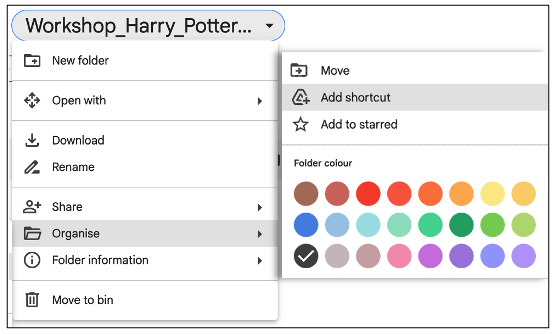

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
harry_dir = '/content/drive/MyDrive/Workshop_Harry_Potter_Cognition' #@param {type:"string"}

In [ ]:
brain_data = os.path.join(harry_dir,'entire_brain_data')
stimuli_data  = os.path.join(harry_dir,'stimuli_data')
roi_data = os.path.join(harry_dir,'roi_data')
current_directory = os.getcwd()

## 1.1 | Downloading Locally

To download the dataset we will be using the API from Net2Brain, which is a toolbox which guides in explaining cortical representations using deep neural network with a multiude of models and metrics. This toolbox also contains various datasets to direcly play with the toolbox, such as former Algonauts Datasets, parts of the NSD dataset and this Harry Potter dataset. To download the data execute the cell below

In [2]:
from net2brain.utils.download_datasets import Workhsop_Harry_Potter_Cognition

Harry_dataset = Workhsop_Harry_Potter_Cognition()
Harry_paths = Harry_dataset.load_dataset()

In [ ]:
pprint(Harry_paths)
stimuli_data = Harry_paths["stimuli_path"]
brain_data = Harry_paths["brain_path"]
roi_data = Harry_paths["roi_path"]
current_directory = os.getcwd()

---
---

# 2 | Getting to Know the Data Before Playing with It

The downloaded data comes with three main folders:

**entire_brain_data**:
* Contains fMRI activations from **8 subjects**
* An example file with shape (325, 37913) indicates the participant has seen 325 sentences with 37913 recorded voxels

**stimuli_data**:
* Contains the actual sentences that each of the 8 subjects saw

**roi_data**:
* Contains a subset of the original fMRI activations from the right and left hemispheres of the Lingual Gyrus and Middle Frontal Gyrus (MFG) areas for each of the subjects.

**Questions:**

1. **What is the [Lingual Gyrus](https://en.wikipedia.org/wiki/Lingual_gyrus)?**
   * Primarily involved in visual processing, especially related to vision, letter recognition, and encoding complex images.

2. **What is the [Middle Frontal Gyrus](https://en.wikipedia.org/wiki/Middle_frontal_gyrus)?**
   * Associated with higher cognitive functions such as attention, working memory, planning, and understanding the meaning of words and sentences.


In [4]:
# Dropdown for selecting subject
subject_dropdown = widgets.Dropdown(
    options=[str(i) for i in range(1, 9)],
    value='1',
    description='Subject:'
)

# Display dropdown
display(subject_dropdown)

# Button to trigger the display of selected data
button = widgets.Button(description="Show Data")
output = widgets.Output()

# Set the button click event
button.on_click(display_data)

# Display button and output
display(button, output)

Dropdown(description='Subject:', options=('1', '2', '3', '4', '5', '6', '7', '8'), value='1')

Button(description='Show Data', style=ButtonStyle())

Output()

### Visualizing the fMRI-data by creating an RDM

In [10]:
from net2brain.rdm.dist_utils import dist

metric = 'cosine' # @param ['l2', 'euclidean', 'l1', 'manhattan', 'cosine', 'pearson', 'correlation']

brain_fmri_data = np.load(selected_brain_data_path , allow_pickle=True)

fmri_rdm  = dist(brain_fmri_data,
                 chunk_size=512,
                 metric=metric,
                 device="cpu")

plt.imshow(fmri_rdm)

## 2.1 Getting to Know the ROI-Reduced Data

We will only consider two ROIs because training an encoding model with the whole brain would take too long, and since our LLM data will be too small, we will not be able to learn a good model to predict the brain responses.


In [5]:
# Dropdown for selecting subject
subject_dropdown_reduced = widgets.Dropdown(
    options=[str(i) for i in range(1, 9)],
    value='1',
    description='Subject:'
)

# Dropdown for selecting ROI
roi_dropdown = widgets.Dropdown(
    options=['Lingual', 'MFG'],
    value='Lingual',
    description='ROI:'
)

# Dropdown for selecting hemisphere
hemisphere_dropdown = widgets.Dropdown(
    options=['L', 'R'],
    value='L',
    description='Hemisphere:'
)

# Display dropdowns
display(subject_dropdown_reduced)
display(roi_dropdown)
display(hemisphere_dropdown)

# Button to trigger the display of selected data
button_reduced = widgets.Button(description="Show Data")
output_reduced = widgets.Output()

# Set the button click event
button_reduced.on_click(display_data_reduced)

# Display button and output
display(button_reduced, output_reduced)


Dropdown(description='Subject:', options=('1', '2', '3', '4', '5', '6', '7', '8'), value='1')

Dropdown(description='ROI:', options=('Lingual', 'MFG'), value='Lingual')

Dropdown(description='Hemisphere:', options=('L', 'R'), value='L')

Button(description='Show Data', style=ButtonStyle())

Output()

### Visualizing the fMRI-data by creating an RDM

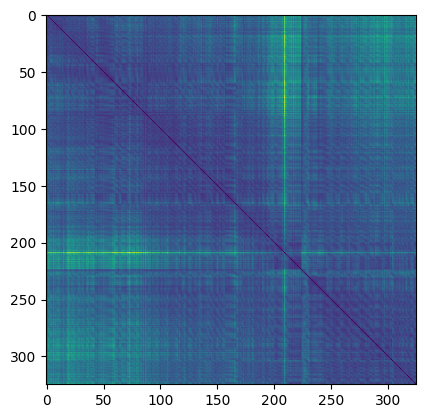

In [12]:
from net2brain.rdm.dist_utils import dist

metric = 'cosine' # @param ['l2', 'euclidean', 'l1', 'manhattan', 'cosine', 'pearson', 'correlation']

brain_fmri_data = np.load(selected_brain_data_path_reduced, allow_pickle=True)

fmri_rdm  = dist(brain_fmri_data,
                 chunk_size=512,
                 metric=metric,
                 device="cpu")

plt.imshow(fmri_rdm)

# 3 | Correlation of fMRI to Large Language Models (LLMs) using Linear Encoding

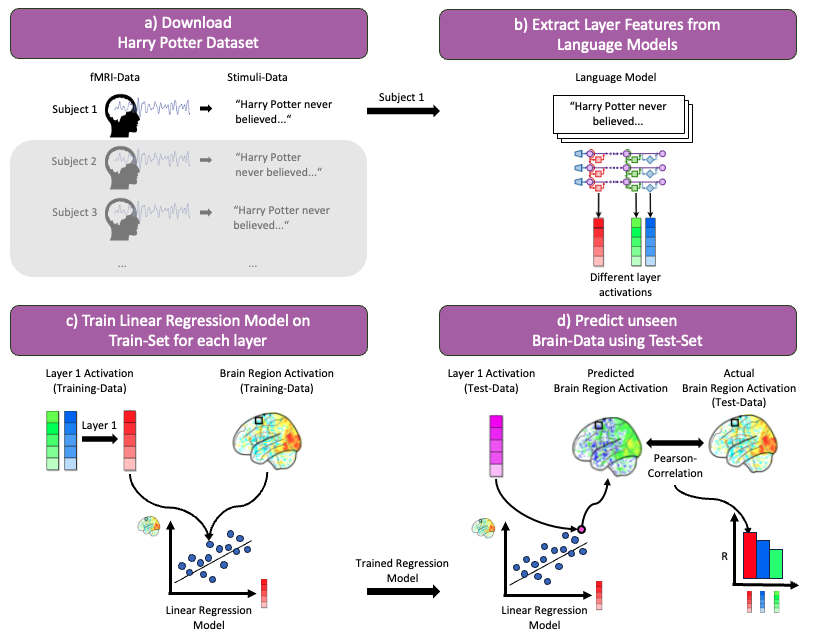

In this step, we use Linear Encoding to compare the activations of **Large Language Models (LLMs)** with human fMRI responses to the text. This method trains a classifier using the model activations to see how well it can predict brain activity it has not seen before. This helps us understand the models' effectiveness in mimicking human brain processes.

* **Step a):** Download HarryPottter-Dataset (already done)
* **Step b):** Extract features from **LLMs** for the same text that the participants have read
* **Step c):** For each of the extracted layers, use the model features to train a classifier that predicts the brain data for the same images on a training set
* **Step d):** Now using the held-out test set, use the encoding model to predict what the brain responses would look like to unseen images. Then compute the Pearson correlation between the predicted brain activation and the actual brain activation. This value will be the measure of how well our model is able to predict brain responses.


## 3.1 | Selecting a fitting Large Language Model using **Net2Brains** Model Taxonomy

The Net2Brain toolbox offers a large number of models from which you can extract the intermediate features. With a total of over 600 models, it can be overwhelming to read through all the models. Therefore, Net2Brain provides a **Model Taxonomy**, allowing you to filter through the different models according to their attributes.

In [13]:
from net2brain.taxonomy import show_taxonomy
from net2brain.taxonomy import find_model_by_custom
show_taxonomy()

/Users/domenicbersch/anaconda3/envs/vit-cls/lib/python3.9/site-packages/transformers/utils/generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/domenicbersch/anaconda3/envs/vit-cls/lib/python3.9/site-packages/transformers/utils/generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/domenicbersch/anaconda3/envs/vit-cls/lib/python3.9/site-packages/transformers/utils/generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


{'Architecture': ['Convolutional Neural Network',
                  'Swin-Transformer',
                  'Transformer-based Models',
                  'MLP-Mixer',
                  'Vision Transformer',
                  'Multimodal'],
 'Pre-Training Dataset': ['Taskonomy',
                          'ImageNet',
                          'ImageNet 22K',
                          'COCO',
                          'Places 365',
                          'ADEK20K',
                          'COYO-700M',
                          'LVIS',
                          'English Corpus',
                          'Cityscapes',
                          'PASCAL VOC'],
 'Training Method': ['Contrastive Language Image Pre-Training',
                     'Supervised',
                     'Jigsaw',
                     'NPID',
                     'RotNet',
                     'Clusterfit',
                     'Deepcluser',
                     'SimCLR',
                     'SwAV',
              

We need a transformer-based model for our experiment. Let's take a look at which ones are currently available.


In [14]:
find_model_by_custom(["Transformer-based Models"])

Netset                                Model  \
605  Huggingface                       albert-base-v2   
606  Huggingface                kakaobrain/align-base   
607  Huggingface                   facebook/bart-base   
608  Huggingface                                 gpt2   
609  Huggingface  bert-large-cased-whole-word-masking   
610  Huggingface                    bert-base-uncased   

    Transformer-based Models COYO-700M English Corpus  
605                        1         0              1  
606                        1         1              0  
607                        1         0              1  
608                        1         0              1  
609                        1         0              1  
610                        1         0              1

## 2.2 | Understanding the selected model
Each model has its own layers. Let's take a look at which layers one of the selectable models has.


In [15]:
# Dropdown for selecting a model
selected_model = "gpt2" # @param ["albert-base-v2", "kakaobrain/align-base", "facebook/bart-base", "gpt2", "bert-large-cased-whole-word-masking", "bert-base-uncased"] {allow-input: true}
print('Selected Model: ' + selected_model)


from net2brain.feature_extraction import FeatureExtractor

f_extractor = FeatureExtractor(model=selected_model,
                               netset="Huggingface",
                               device="cpu")  # Downloading model weights migiht take a few minutes

Selected Model: gpt2


### Which layers can we extract?

In [16]:
all_layers = f_extractor.get_all_layers()
print(all_layers)

['', 'wte', 'wpe', 'drop', 'h', 'h.0', 'h.0.ln_1', 'h.0.attn', 'h.0.attn.c_attn', 'h.0.attn.c_proj', 'h.0.attn.attn_dropout', 'h.0.attn.resid_dropout', 'h.0.ln_2', 'h.0.mlp', 'h.0.mlp.c_fc', 'h.0.mlp.c_proj', 'h.0.mlp.act', 'h.0.mlp.dropout', 'h.1', 'h.1.ln_1', 'h.1.attn', 'h.1.attn.c_attn', 'h.1.attn.c_proj', 'h.1.attn.attn_dropout', 'h.1.attn.resid_dropout', 'h.1.ln_2', 'h.1.mlp', 'h.1.mlp.c_fc', 'h.1.mlp.c_proj', 'h.1.mlp.act', 'h.1.mlp.dropout', 'h.2', 'h.2.ln_1', 'h.2.attn', 'h.2.attn.c_attn', 'h.2.attn.c_proj', 'h.2.attn.attn_dropout', 'h.2.attn.resid_dropout', 'h.2.ln_2', 'h.2.mlp', 'h.2.mlp.c_fc', 'h.2.mlp.c_proj', 'h.2.mlp.act', 'h.2.mlp.dropout', 'h.3', 'h.3.ln_1', 'h.3.attn', 'h.3.attn.c_attn', 'h.3.attn.c_proj', 'h.3.attn.attn_dropout', 'h.3.attn.resid_dropout', 'h.3.ln_2', 'h.3.mlp', 'h.3.mlp.c_fc', 'h.3.mlp.c_proj', 'h.3.mlp.act', 'h.3.mlp.dropout', 'h.4', 'h.4.ln_1', 'h.4.attn', 'h.4.attn.c_attn', 'h.4.attn.c_proj', 'h.4.attn.attn_dropout', 'h.4.attn.resid_dropout', 'h.4

### Which Layers Does Net2Brain Suggest for Extraction?

In most cases, a model has far too many layers from which you could extract the features, and many of them are relatively insignificant. Therefore, it makes sense to only look at the features of a few layers. Since the choice can sometimes be a bit difficult, Net2Brain suggests which layers might be interesting to extract. If you do not agree, you can overwrite these layers with the parameter `layers_to_extract=['layer1', 'layer2', 'layer3', 'layer4']` of the `.extract()` function.

Below we see the preselected layers of Net2Brain.


In [17]:
layers_to_extract = f_extractor.layers_to_extract
print(layers_to_extract)

['h.0', 'h.1', 'h.2', 'h.3', 'h.4', 'h.5', 'h.6', 'h.7', 'h.8', 'h.9', 'h.10', 'h.11']


## 3.1 Extract features from model to the stimuli from the dataset

In this step, we will extract the intermediate model features of a **Large Language Model** using the toolbox **Net2Brain**. With this toolbox, you can simply select the model name to extract the data given input stimuli, which in our case are the Harry Potter .txt files.


In [ ]:
####################################################

# Dropdown for selecting a model
selected_model = "gpt2" # @param ["albert-base-v2", "kakaobrain/align-base", "facebook/bart-base", "gpt2", "bert-large-cased-whole-word-masking", "bert-base-uncased"] {allow-input: true}
print('Selected Model: ' + selected_model)

# Construct the file path (text is the same for all subjects, so this does not matter too much)
text_data = f"{stimuli_data}/words_TR_list_subj1_run01.txt"

####################################################


from net2brain.feature_extraction import FeatureExtractor

fx_extractor = FeatureExtractor(model=selected_model,
                               netset="Huggingface",
                               device="cpu")  # Downloading model weights migiht take a few minutes

# Extract features
folder = selected_model.replace("/", "_")
fx_extractor.extract(data_path=[text_data],
                     save_path=f"{folder}_feats",
                     consolidate_per_layer=False)

## 3.2 Automated Linear Encoding

**Net2Brain** offers multiple metrics for evaluating model activations against brain responses. In addition to RSA and Variance Partitioning Analysis, it also provides Linear Encoding, which can be called using a single function and has multiple parameters to adapt.

Execute the cell to see dropdowns to execute multiple instances of Linear Encoding!

**Hint:** You can select **multiple** elements by pressing Strg/Command

In [ ]:
# Start Linear Encoding
from net2brain.evaluations.encoding import Linear_Encoding

# Function to run linear encoding
def run_linear_encoding(models, subjects, hemispheres, rois, n_folds, n_components, batch_size):
    if n_components >= batch_size:
        print("n_components must be smaller than batch_size")
        return

    for subject in subjects:
        for hemisphere in hemispheres:
            for roi in rois:
                roi_file = f'{roi}_{hemisphere}_subj{subject}.npy'
                roi_data_path = os.path.join(roi_data, roi_file)

                config = f"{n_folds}f_{n_components}c_{batch_size}b"

                for model in models:
                    model_name = model + '_feats'

                    # Start Net2Brains Linear Encoding

                    Linear_Encoding(
                        feat_path=os.path.join(current_directory, model_name),
                        roi_path=roi_data_path,
                        model_name=f"{model_name}_{config}",
                        trn_tst_split=0.8,
                        n_folds=n_folds,
                        n_components=n_components,
                        batch_size=batch_size,
                        random_state=42,
                        return_correlations=True,
                        save_path=f"Tutorial_LE_Results_Harry/subj{subject}",
                        file_name=f"{model_name}_{roi}_{hemisphere}_{config}",
                        avg_across_feat=True
                    )

                    print("")
                    print(f"Finished running Linear Encoding for subject={subject}, hemisphere={hemisphere}, roi={roi}, model={model_name}")


# Create and display widgets for linear encoding
create_linear_encoding_widgets()

## 3.4 Plotting the results

Select a subject of your choice for which you have already created the Linear Encoding data. This will then plot the best performing layers in predicting the brain activity per ROI.


In [ ]:
from net2brain.evaluations.plotting import Plotting

subject = 'subj1' # @param ['subj1', 'subj2', 'subj3', 'subj4', 'subj5', 'subj6', 'subj7', 'subj8'] {allow-input: true}

dataframes = load_csv_files_from_folder(f"Tutorial_LE_Results_Harry/{subject}")

plotter = Plotting(dataframes)
results_dataframe = plotter.plot(metric="R", rotation=30)
print(results_dataframe)

# 4 | Results

With which ROIs do the models have the highest correlations? If you look at the explanations of the cortical regions, would you say that these results make sense?


**What is the [Lingual Gyrus](https://en.m.wikipedia.org/wiki/Lingual_gyrus)?**
* Primarily involved in visual processing, especially related to vision, letter recognition, and encoding complex images.

**What is the [Middle Frontal Gyrus](https://en.m.wikipedia.org/wiki/Middle_frontal_gyrus)?**
*  Associated with higher cognitive functions such as attention, working memory, planning, and understanding the meaning of words and sentences.